# 电信套餐制定案例
下面是一份电信话单的统计数据，其以客户编号为分组，统计了每个用户一个月内的工作日上班电话时长、工作日下班电话时长、周末电话时长、国际电话时长、总电话时长、平均每次通话时长这6个指标

1. 完成数据集读取；
2. 完成数据集的缺失值填充，把所有放弃投票的值填充为字符串None；
3. 将所有议题作为分类特征
4. 构建分类独热编码器
5. 完成数据分类模型构建及训练
6. 对模型进行10折交叉检验
7. 完成数据分类预测

In [68]:
import pandas as pd

In [69]:
data = pd.read_csv('电话套餐制定.csv')

In [70]:

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib.font_manager import FontProperties

In [71]:
# 设置中文字体
font = FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc', size=10)
plt.rcParams['font.family'] = font.get_name()
plt.rcParams['font.size'] = font.get_size()

In [72]:
f_cols = data.columns[1:].tolist()

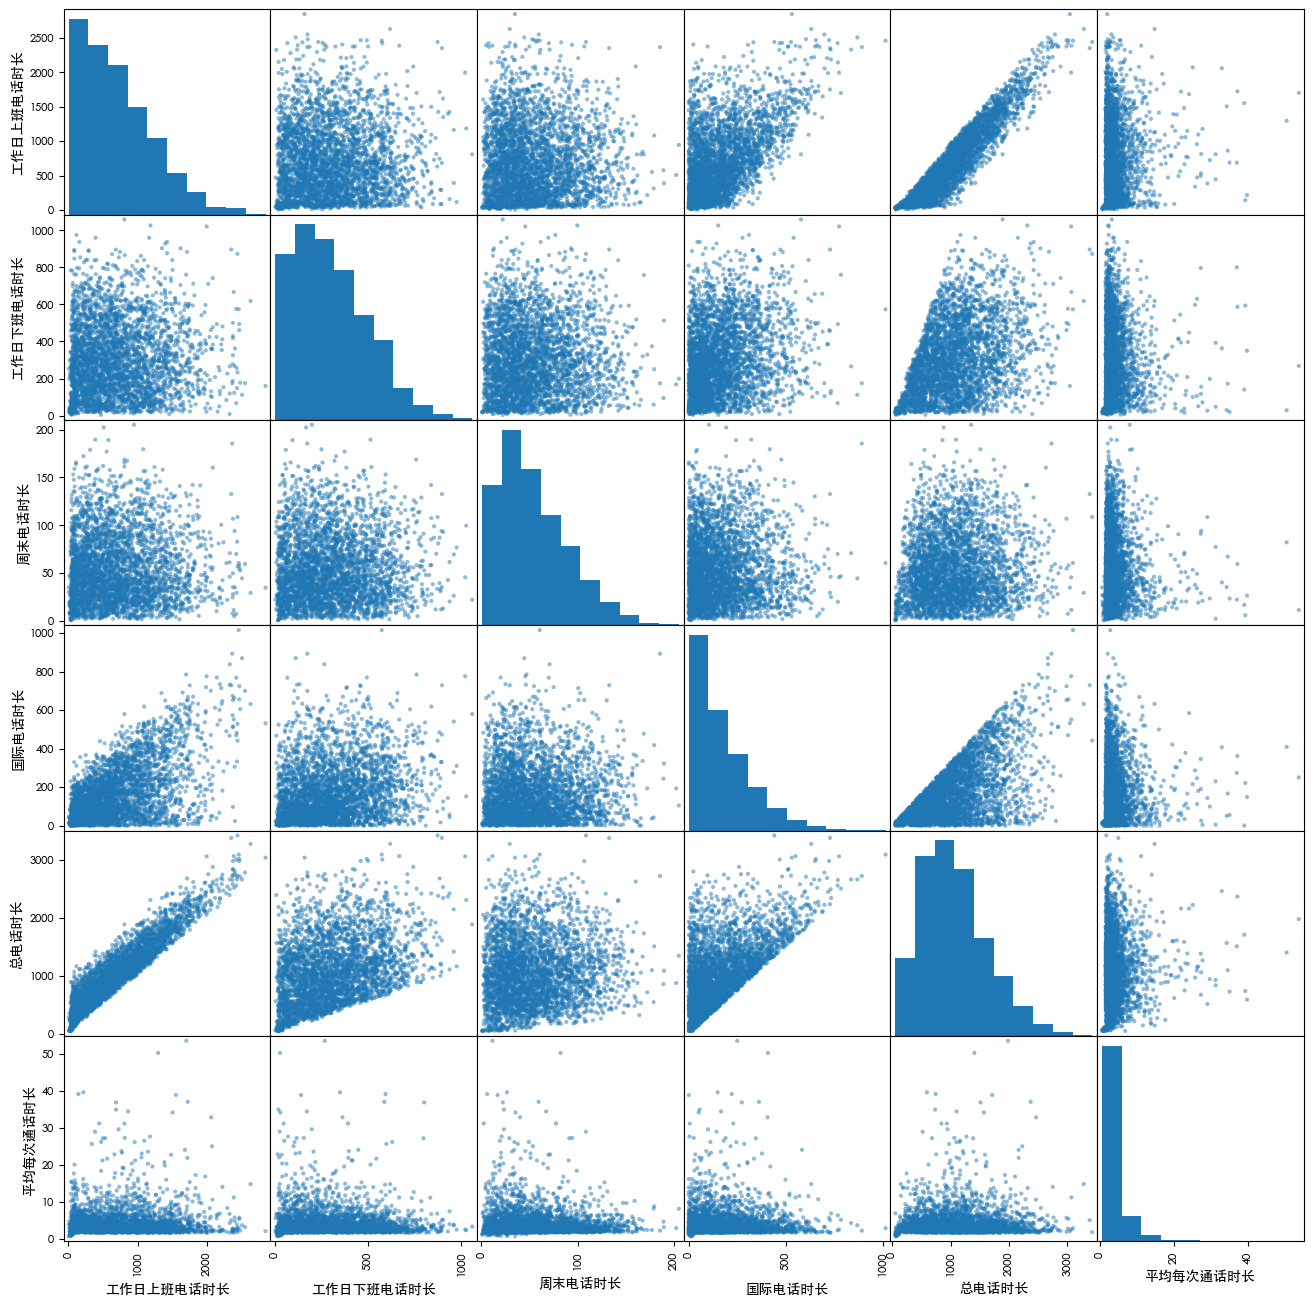

In [73]:
axes = scatter_matrix(
    data[f_cols],
    diagonal='hist',
    figsize=(16, 16)
)

In [74]:
d_corr = data[f_cols].corr()
d_corr

,工作日上班电话时长,工作日下班电话时长,周末电话时长,国际电话时长,总电话时长,平均每次通话时长
工作日上班电话时长,1.000000,0.043699,0.015910,0.566341,0.935010,0.085829
工作日下班电话时长,0.043699,1.000000,0.017072,0.240043,0.389531,-0.037760
周末电话时长,0.015910,0.017072,1.000000,0.032068,0.083441,-0.048015
国际电话时长,0.566341,0.240043,0.032068,1.000000,0.605973,0.015420
总电话时长,0.935010,0.389531,0.083441,0.605973,1.000000,0.062688
平均每次通话时长,0.085829,-0.037760,-0.048015,0.015420,0.062688,1.000000


In [75]:
from sklearn.decomposition import PCA

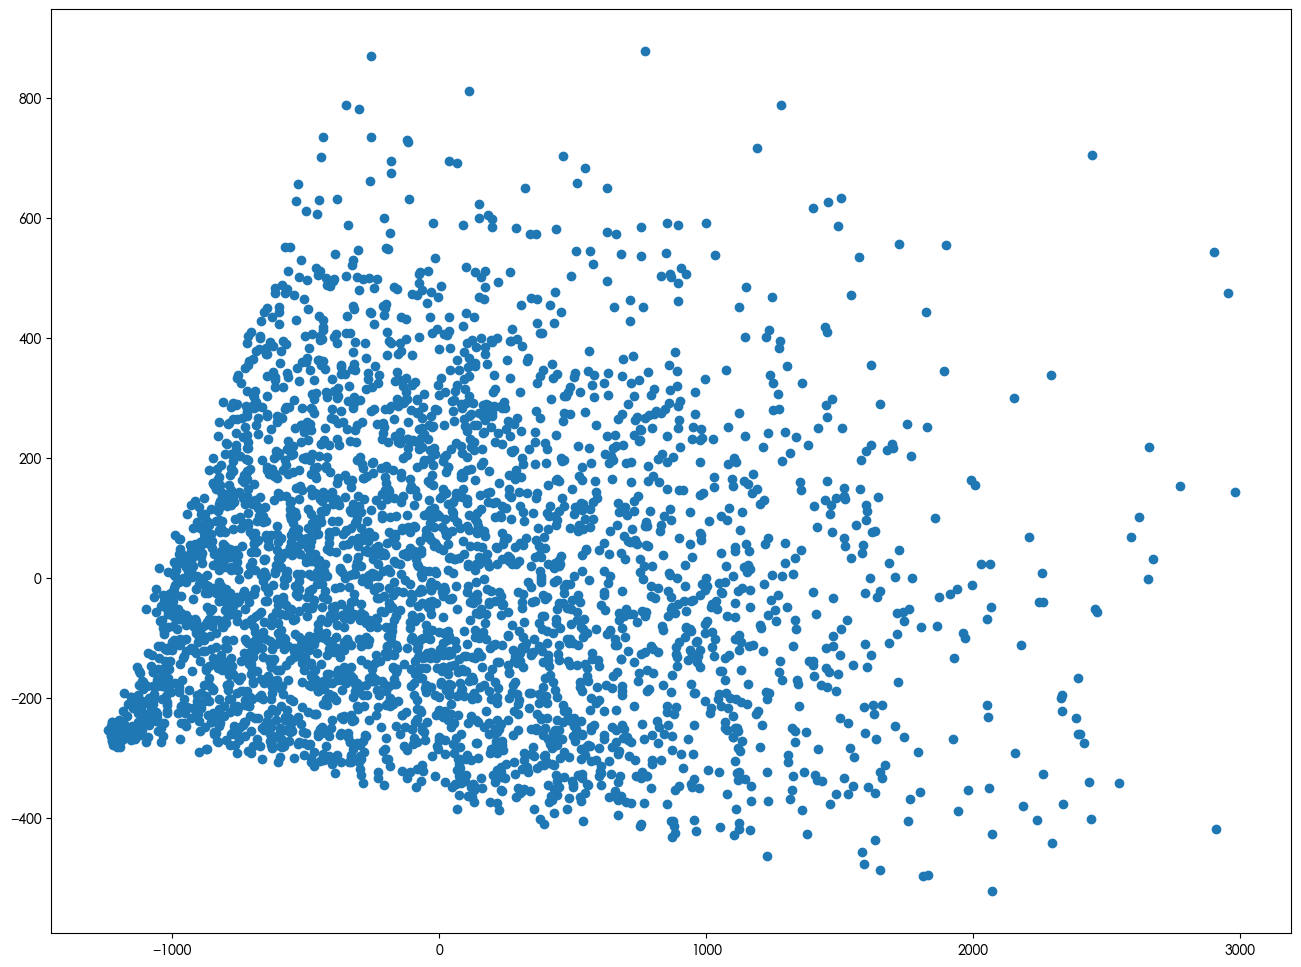

In [76]:
pca_2 = PCA(n_components=2)
data_pca_2 = pd.DataFrame(
    pca_2.fit_transform(data[f_cols])
)
plt.figure(figsize=(16, 12))
plt.scatter(
    data_pca_2[0],
    data_pca_2[1]
)

In [77]:
from sklearn.cluster import KMeans

In [78]:
km_model = KMeans(n_clusters=3)
km_model = km_model.fit(data[f_cols])

/Users/liang/anaconda3/envs/python-course/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [79]:
p_target = km_model.predict(data[f_cols])

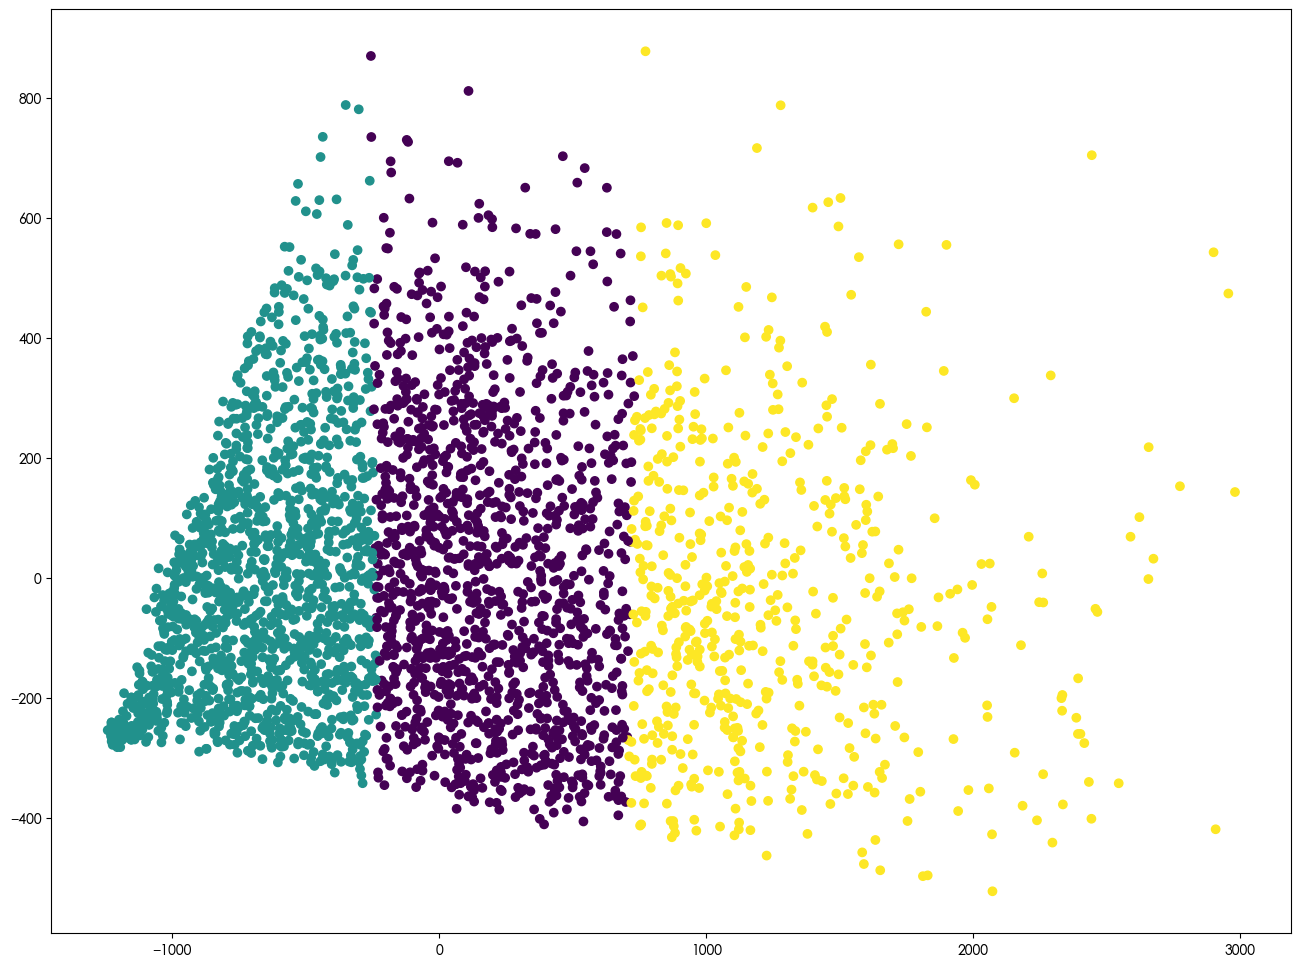

In [80]:
plt.figure(figsize=(16, 12))
plt.scatter(
    data_pca_2[0],
    data_pca_2[1],
    c=p_target
)

In [81]:
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [82]:
f_cols.append('Type')
data['Type'] = p_target

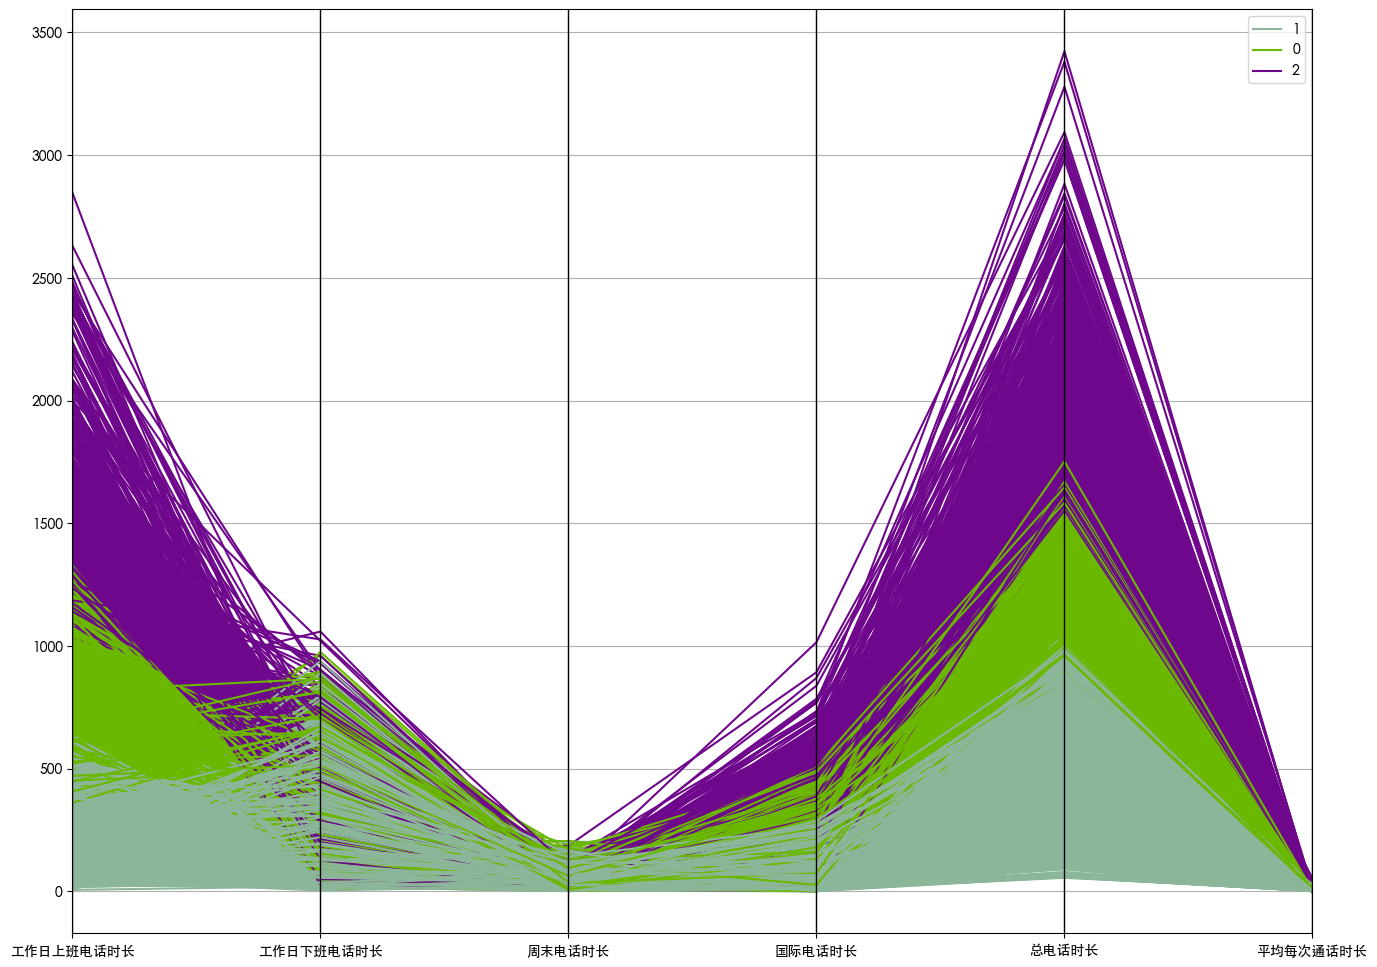

In [83]:
plt.figure(figsize=(16, 12))
ax = parallel_coordinates(
    data[f_cols],
    'Type'
)